# Task 5

## Import necessary Libraries

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

warnings.filterwarnings('ignore')

## Loading Data

In [97]:
df = pd.read_csv("RTA Dataset.csv")

## Displaying first 5 rows

In [99]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


## Displaying shape of the dataset

In [100]:
df.shape

(12316, 32)

## Displaying summary statistics

In [101]:
df.describe(include='all')

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

### Checking Missing Values

In [103]:
df.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

### Dropping columns with missing values

In [104]:
df.drop(['Service_year_of_vehicle', 'Defect_of_vehicle', 'Work_of_casuality', 'Fitness_of_casuality', 'Time'], axis=1, inplace=True)

### Filling Missing Categorical Values with Mode

In [105]:
categorical_columns = [col for col in df.columns if df[col].dtype == 'O']
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


## Data Visualization

### Accident Severity Distribution

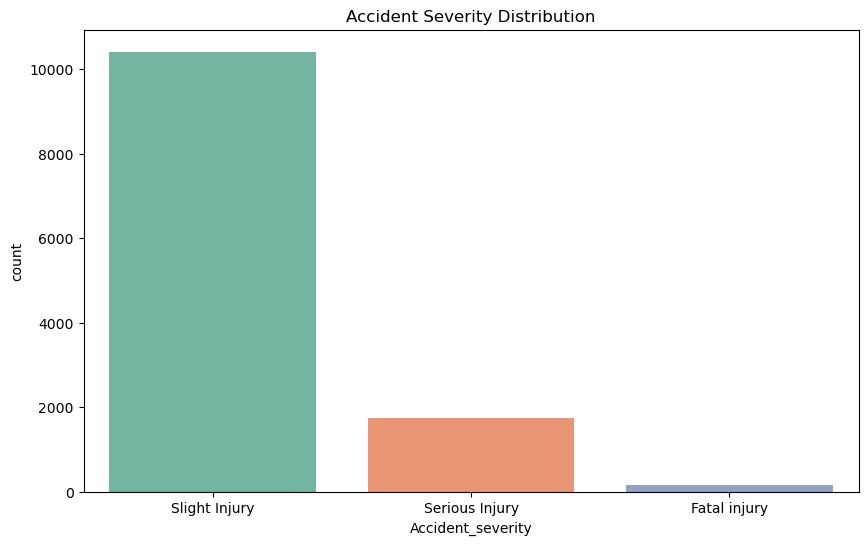

In [106]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Accident_severity', data=df, palette='Set2')
plt.title('Accident Severity Distribution')
plt.show()

### Distribution of Accidents by Driver Sex

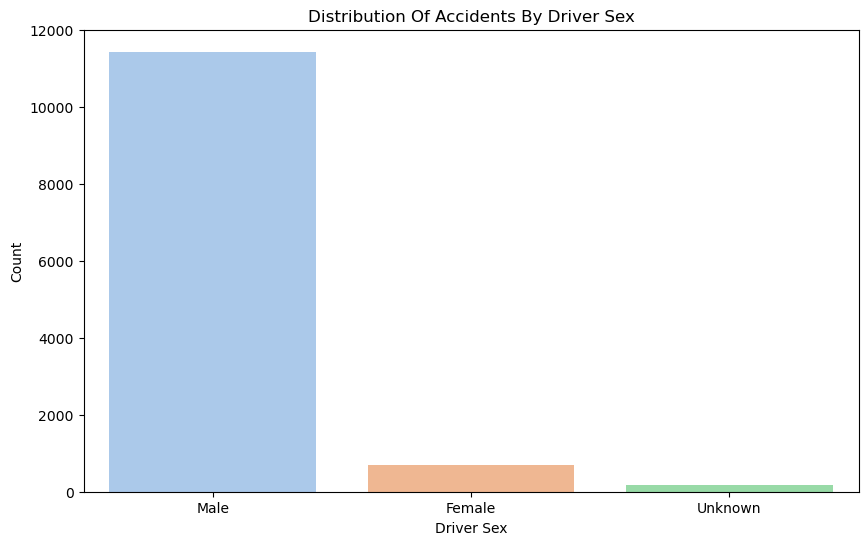

In [107]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sex_of_driver', data=df, palette='pastel',hue='Sex_of_driver', legend=False )
plt.title('Distribution Of Accidents By Driver Sex')
plt.xlabel('Driver Sex')
plt.ylabel('Count')
plt.show()

### Plotting the Relationship Between Casualties and Vehicles Involved

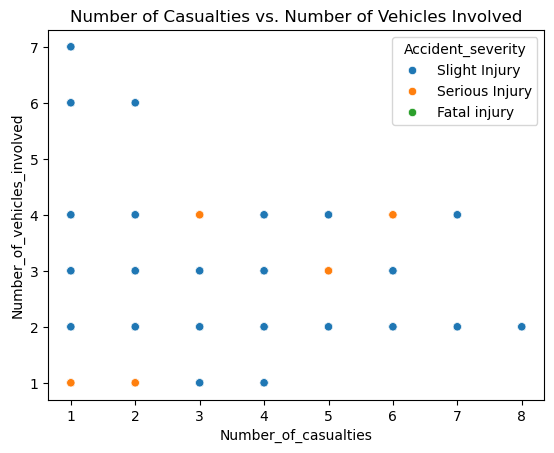

In [108]:
sns.scatterplot(x='Number_of_casualties', y='Number_of_vehicles_involved', hue='Accident_severity', data=df)
plt.title('Number of Casualties vs. Number of Vehicles Involved')
plt.show()


### Heatmap to Visualize Correlation between Numerical Columns

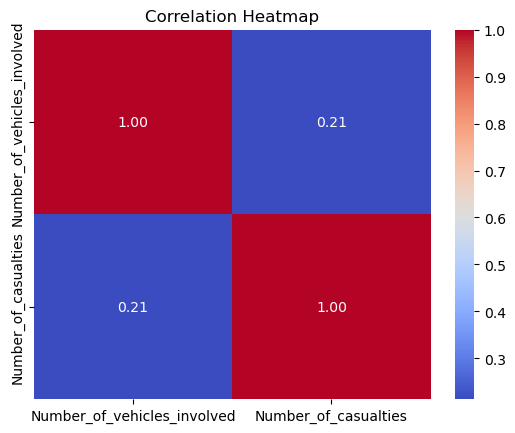

In [109]:
numerical_columns = [col for col in df.columns if df[col].dtype != 'O']
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Distribution of Numerical Columns

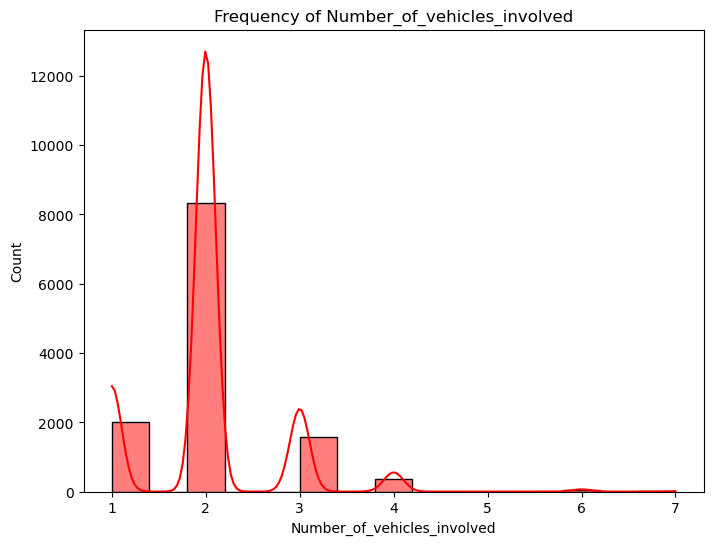

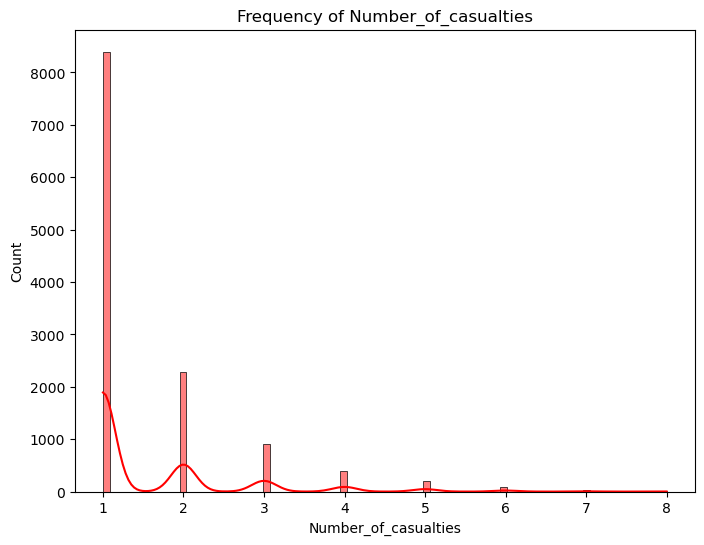

In [110]:
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, color='red')
    plt.title(f'Frequency of {col}')
    plt.show()


### Countplots for Categorical Columns


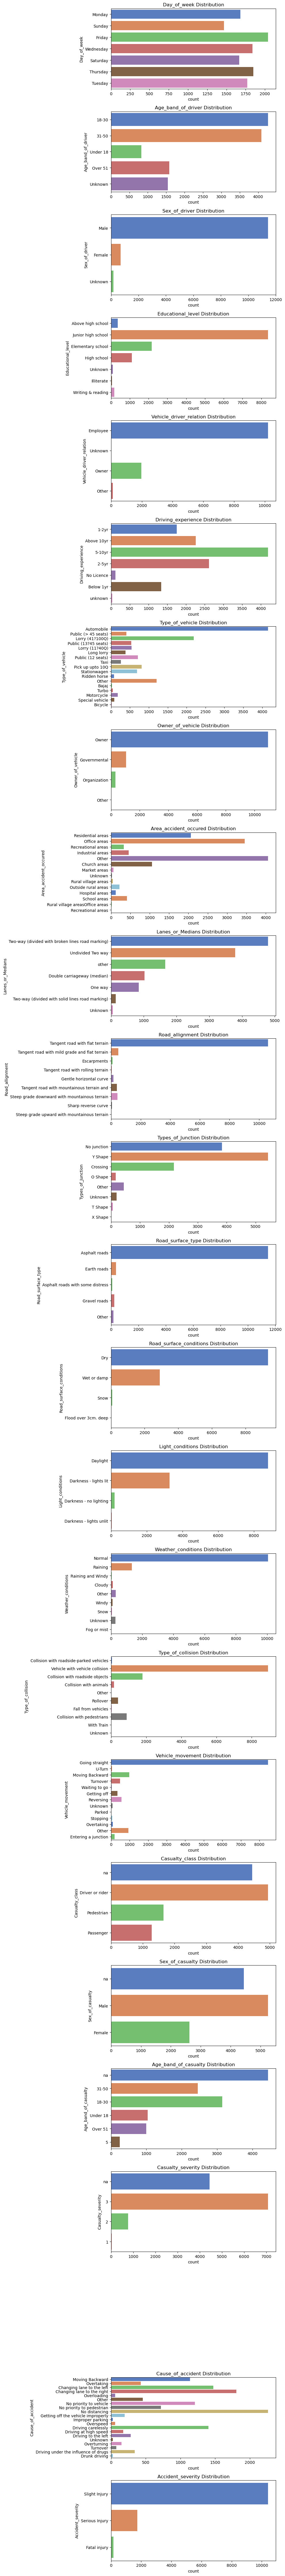

In [111]:
plt.figure(figsize=(10,100))
for i, col in enumerate(categorical_columns, 1):
    if col != 'Pedestrian_movement': 
        plt.subplot(28, 1, i)
        sns.countplot(y=col, data=df, palette='muted')
        plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

In [112]:

# Identify categorical columns (excluding the target variable)
from sklearn.preprocessing import LabelEncoder
categorical_columns = [col for col in X.columns if X[col].dtype == 'O']

# Apply Label Encoding to convert categorical columns
for col in categorical_columns:
    X[col] = LabelEncoder().fit_transform(X[col])


In [89]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [91]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [92]:
y_pred = model.predict(X_test)

In [93]:
cm = confusion_matrix(y_test, y_pred)

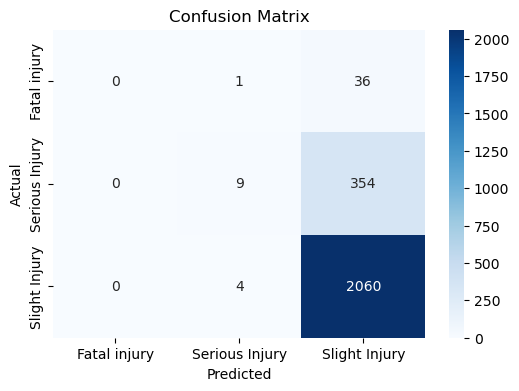

In [94]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [95]:
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00        37
Serious Injury       0.64      0.02      0.05       363
 Slight Injury       0.84      1.00      0.91      2064

      accuracy                           0.84      2464
     macro avg       0.49      0.34      0.32      2464
  weighted avg       0.80      0.84      0.77      2464

